# Exploratory Data Analysis of the National Collision Database 2017

In [1]:
import pandas as pd
import numpy as np
import altair as alt

from sklearn.model_selection import train_test_split

alt.data_transformers.enable("data_server")
alt.renderers.enable("mimetype");

## Read in the data set

The data set used in this project is National Collision Database (NCDB) 2017 – a database containing all police-reported motor vehicle collisions on public roads in Canada in 2017. 
<ul>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/01426d41-529c-443f-a901-6bc2f94f3d73">
      Data file can be found here.</a></li>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/09b74afc-2745-4382-8a02-3e256c4b28fd">
      Data dictionary can be found here.</a></li>

In [2]:
# Importing NCDB
ncdb = pd.read_csv("../data/raw/NCDB_2017.csv", low_memory=False, skiprows=1)

# Making all columns contain strings
ncdb = ncdb.astype("string")

# Creating 'FATALITY' column
ncdb.loc[ncdb["C_SEV"] == "1", "FATALITY"] = int(1)
ncdb.loc[ncdb["C_SEV"] != "1", "FATALITY"] = int(0)

# Dropping irrelevant or redundant columns
ncdb = ncdb.drop(columns=["C_YEAR", "C_CASE", "P_ISEV", "V_ID", "P_ID", "C_SEV"])

## Summarize the entire data set

Each row in the data set represents different aspects of a collision, including the severity of the collision (no injury or injury or fatality) and other details (collision time, weather condition, road type, vehicle type, etc.).

In [3]:
ncdb.sort_index()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,FATALITY
0,01,1,10,01,02,03,1,3,2,18,01,UUUU,M,75,11,NN,1,0.0
1,01,1,12,01,04,UU,1,5,1,UU,01,UUUU,F,21,11,02,1,0.0
2,01,1,00,01,03,UU,7,3,1,UU,01,UUUU,F,34,11,02,1,0.0
3,01,1,17,02,21,UU,1,1,1,18,01,UUUU,F,50,11,02,1,0.0
4,01,1,17,02,21,UU,1,1,1,18,01,UUUU,M,63,11,NN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289836,UU,U,UU,UU,UU,01,U,U,U,UU,01,UUUU,F,20,11,NN,1,0.0
289837,UU,U,UU,UU,UU,01,U,U,U,UU,01,UUUU,F,47,11,NN,1,0.0
289838,UU,U,UU,UU,UU,01,U,U,U,UU,07,UUUU,M,24,11,NN,1,0.0
289839,UU,U,23,01,03,01,1,1,2,18,16,UUUU,M,45,96,09,U,0.0


In [4]:
ncdb.shape

(289841, 18)

## Partition the data set into training and test sets

We will split the data such that the training set takes 80% of observations and the test set takes 20% of observations.

In [5]:
train_df, test_df = train_test_split(ncdb, test_size=0.2, random_state=21)

We will "lock" the test set and only look at the training set from now on. The train data set has 231872 observations and 18 features. The number of observations for the no-fatality vs. fatality classes is shown as follows.

In [6]:
train_count = pd.DataFrame(train_df["FATALITY"].value_counts())
train_count.rename(index={0:"No fatality", 1:"Fatality"}, columns={"FATALITY":"Train Count"}, inplace=True)
train_count

,Train Count
No fatality,228360
Fatality,3512


From the data summary, we see a lot of missing values represented with characters such as "N", "U", "X", etc. We will replace them with "missing" before we carry out EDA to avoid errors later on when we try to pass the data to a classifier. 

In [7]:
null_value = ["N", "NN", "NNNN", "Q", "QQ", "U", "UU", "UUUU", "X", "XX", "XXXX"]
train_df = train_df.replace(to_replace=null_value, value="missing")
test_df = test_df.replace(to_replace=null_value, value="missing")
train_df.shape

(231872, 18)

In [8]:
train_df.sort_index()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,FATALITY
0,01,1,10,01,02,03,1,3,2,18,01,missing,M,75,11,missing,1,0.0
1,01,1,12,01,04,missing,1,5,1,missing,01,missing,F,21,11,02,1,0.0
2,01,1,00,01,03,missing,7,3,1,missing,01,missing,F,34,11,02,1,0.0
3,01,1,17,02,21,missing,1,1,1,18,01,missing,F,50,11,02,1,0.0
4,01,1,17,02,21,missing,1,1,1,18,01,missing,M,63,11,missing,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289832,missing,missing,missing,missing,missing,01,missing,missing,missing,missing,01,missing,M,72,11,missing,1,0.0
289836,missing,missing,missing,missing,missing,01,missing,missing,missing,missing,01,missing,F,20,11,missing,1,0.0
289838,missing,missing,missing,missing,missing,01,missing,missing,missing,missing,07,missing,M,24,11,missing,1,0.0
289839,missing,missing,23,01,03,01,1,1,2,18,16,missing,M,45,96,09,missing,0.0


We gather the summary statistics of the train data set as follows.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231872 entries, 200576 to 80841
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   C_MNTH    231872 non-null  object 
 1   C_WDAY    231872 non-null  object 
 2   C_HOUR    231872 non-null  object 
 3   C_VEHS    231872 non-null  object 
 4   C_CONF    231872 non-null  object 
 5   C_RCFG    231872 non-null  object 
 6   C_WTHR    231872 non-null  object 
 7   C_RSUR    231872 non-null  object 
 8   C_RALN    231872 non-null  object 
 9   C_TRAF    231872 non-null  object 
 10  V_TYPE    231872 non-null  object 
 11  V_YEAR    231872 non-null  object 
 12  P_SEX     231872 non-null  object 
 13  P_AGE     231872 non-null  object 
 14  P_PSN     231872 non-null  object 
 15  P_SAFE    231872 non-null  object 
 16  P_USER    231872 non-null  object 
 17  FATALITY  231872 non-null  float64
dtypes: float64(1), object(17)
memory usage: 33.6+ MB


## Perform exploratory data analysis on the training set

In order to determine which features might be useful to predict the fatality class, we plotted two bar charts (one for each class) compare the distributions of each feature from the training data set.

Before plotting, we would need to convert P_SEX column so that all features are of the quantitative type, then create the list of all features to feed into the plots.

In [10]:
# Converts values of P_SEX column into numeric
sex = {"M": 1, "F": 0, "missing": "missing"}
train_df["P_SEX"] = [sex[item] for item in train_df["P_SEX"]]

# Creates the list of features to feed into distribution plots
features = list(set(train_df.columns.values) - set(["index", "FATALITY"]))

Based on the plotted distributions, we observed that:
1. There is a huge class imbalance that we need to take into account when building the model. Hence, the inital EDA might not show us the entire picture of the underlying data. 
2. Some features stand out to be more useful for our model because there is quite a difference in their distributions between two classes. For example:
    - V_YEAR: Majority of collisions that happened before 2000s would lead to fatalities.
    - C_CONF: The center and the spread of collision configuration are very different between two classes. For example, a fatality seemed to be more likely in case of a head-on collision (C_CONF = 31) while it did not in case of a rear-end collision (C_CONF = 21).
    - C_HOUR: More fatalities occurred before dawn or after dusk.
    - P_AGE: The distribution of P_AGE for FATALITY = True is bimodal while it is unimodal for FATALITY = False.
3. Some features look similar in their distributions between two classes such as P_SEX, P_PSN, P_USER, C_WTHR, etc. Hence, we might omit these predictors from our model.

In [11]:
# Creates distribution plots when Fatality = 0
Chart_False = (
    alt.Chart(train_df)
    .mark_bar(opacity=0.7)
    .encode(
        x=alt.X(alt.repeat("row"), type="quantitative", bin=alt.Bin(maxbins=40)),
        y=alt.Y("count()", title="Number of collisions"),
        color=alt.Color("FATALITY", scale=alt.Scale(scheme="category20c"), legend=None))
    .properties(width=150, height=100)
    .repeat(
        row=features,
        title="No fatality")
    .resolve_scale(y="independent")
    .transform_filter(alt.FieldOneOfPredicate(field="FATALITY", oneOf=[0]))
)
    
# Creates distribution plots when Fatality = 1
Chart_True = (
    alt.Chart(train_df)
    .mark_bar(opacity=0.7)
    .encode(
        x=alt.X(alt.repeat("row"), type="quantitative", bin=alt.Bin(maxbins=40)),
        y=alt.Y("count()", title="Number of collisions"),
        color=alt.Color("FATALITY", scale=alt.Scale(scheme="category20b"), legend=None))
    .properties(width=150, height=100)
    .repeat(
        row=features,
        title="Fatality")
    .resolve_scale(y="independent")
    .transform_filter(alt.FieldOneOfPredicate(field="FATALITY", oneOf=[1]))
)

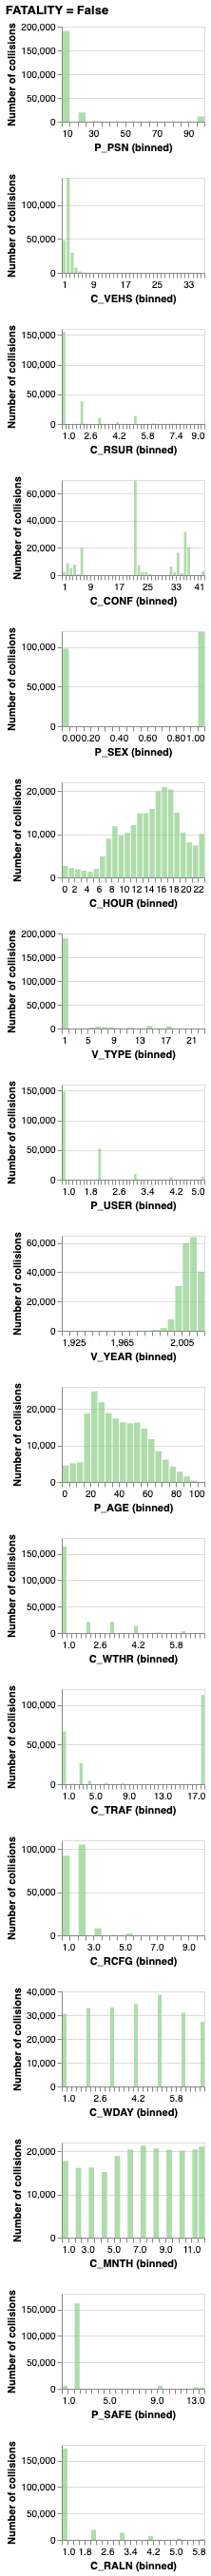

In [12]:
Chart_False

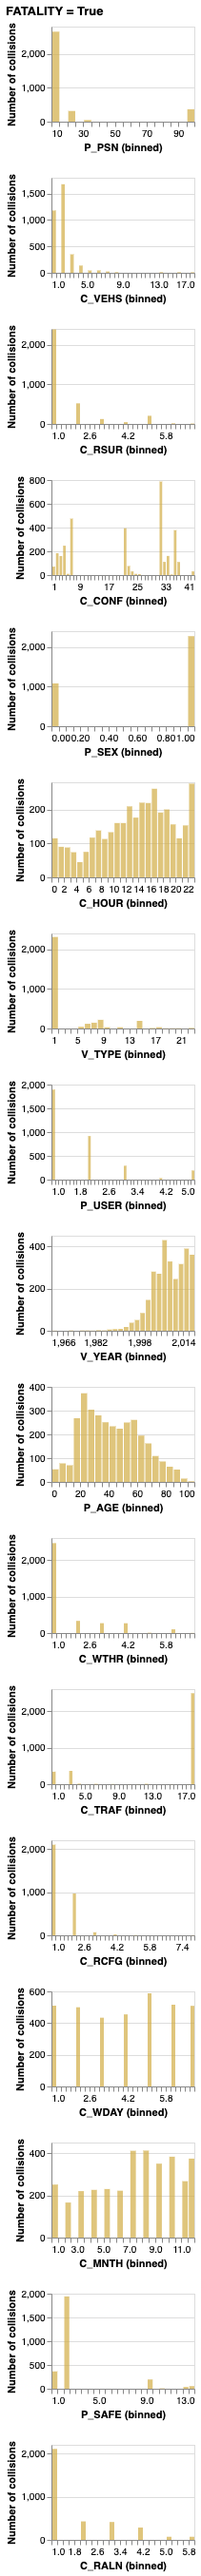

In [13]:
Chart_True

Note: We tried different approaches but could not put two charts next to each other in the same grid. The error we ran into: 
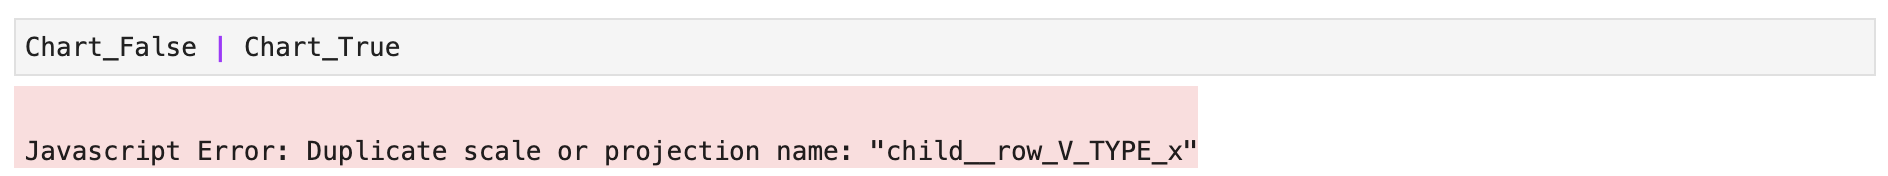

## Create a profile report using `pandas-profiling` (optional)

Uncomment the following code to produce the profile report. We made it optional because the code takes quite a while to run and does not render well on GitHub.

In [14]:
# pip install pandas-profiling
# pip install ipywidgets

#from pandas_profiling import ProfileReport

#profile = ProfileReport(nc_train_nan, title='National Collision Database 2017')

#profile.to_notebook_iframe()